In [ ]:
import numpy as np
import pandas as pd

swipe_data = pd.read_csv('Counts_Avg Meal_Participation.csv')
print(list(swipe_data.columns))
valid_columns = []
for column in list(swipe_data.columns):
        if "Unnamed" not in column:
            print(column)
            valid_columns.append(column)

print(valid_columns)

#GOALS:
# Make some visualizations based off:
# Describe and visualize associations between swipe counts and:
    # Day of the week
    # Residence hall/house
    # Meal (breakfast, lunch, dinner)

['Unnamed: 0', 'Adams', 'Unnamed: 2', 'Cabot', 'Unnamed: 4', 'Currier', 'Unnamed: 6', 'Dunster', 'Unnamed: 8', 'Eliot', 'Unnamed: 10', 'Kirkland', 'Unnamed: 12', 'Leverett', 'Unnamed: 14', 'Lowell', 'Unnamed: 16', 'Mather', 'Unnamed: 18', 'Pforzheimer', 'Unnamed: 20', 'Quincy', 'Unnamed: 22', 'Winthrop', 'Unnamed: 24', 'Annenberg', 'Unnamed: 26', 'Unnamed: 27']
Adams
Cabot
Currier
Dunster
Eliot
Kirkland
Leverett
Lowell
Mather
Pforzheimer
Quincy
Winthrop
Annenberg
['Adams', 'Cabot', 'Currier', 'Dunster', 'Eliot', 'Kirkland', 'Leverett', 'Lowell', 'Mather', 'Pforzheimer', 'Quincy', 'Winthrop', 'Annenberg']


In [ ]:
print(swipe_data.head())
print(swipe_data.columns)
print(swipe_data.unstack())

               Unnamed: 0      Adams Unnamed: 2      Cabot Unnamed: 4  \
0                     NaN  Undergrad  Meal Pool  Undergrad  Meal Pool   
1  Registered for Service         37         47         85         32   
2                  13-Sep        NaN        NaN        NaN        NaN   
3               Breakfast         10          0         12          0   
4                   Lunch         24         12         48          4   

     Currier Unnamed: 6    Dunster Unnamed: 8      Eliot  ... Unnamed: 18  \
0  Undergrad  Meal Pool  Undergrad  Meal Pool  Undergrad  ...   Meal Pool   
1         65         52         71         45         91  ...          47   
2        NaN        NaN        NaN        NaN        NaN  ...         NaN   
3          9          1         14          1         12  ...           1   
4         37          6         41         10         55  ...          10   

  Pforzheimer Unnamed: 20     Quincy Unnamed: 22   Winthrop Unnamed: 24  \
0   Undergrad   Meal Po

In [ ]:
daily = {}

swipe_dataframe = pd.DataFrame(swipe_data)
# print(swipe_dataframe)
# print(type(swipe_dataframe))

# Selecting by column: Annenberg
# Just a test
annenberg = swipe_dataframe[['Annenberg']]
# print(type(annenberg))
# print(annenberg)

# Selecting by column: all valid columns (got rid of unnamed columns)
columns = swipe_dataframe[valid_columns]
# print(columns)
# print(type(columns))

# Selecting by row: breakfast. Indexes correspond to dates 
# Filtered out unnamed columns to include undergrads only
breakfast = columns.iloc[range(3, 47, 4)] 
# print("Breakfast:")
# print(breakfast)

# Selecting by row: lunch. Indexes correspond to dates 
# Filtered out unnamed columns to include undergrads only
lunch = columns.iloc[range(4, 47, 4)] 
# print("Lunch:")
# print(lunch)

# Selecting by row: lunch. Indexes correspond to dates 
# Filtered out unnamed columns to include undergrads only
dinner = columns.iloc[range(5, 47, 4)] 
# print("Dinner:")
# print(dinner)

# print(list(breakfast.iloc[0]))
breakfast_totals = []
lunch_totals = []
dinner_totals = []
for weekday in [1, 2, 3, 4, 5, 6, 0]:
    breakfast_int = list(breakfast.iloc[weekday])
    lunch_int = list(lunch.iloc[weekday])
    dinner_int = list(dinner.iloc[weekday])
    for i in range(len(breakfast_int)):
        breakfast_int[i] = int(breakfast_int[i])
        lunch_int[i] = int(lunch_int[i])
        dinner_int[i] = int(dinner_int[i])
    # breakfast_totals.append(str(sum(breakfast_int)))
    # lunch_totals.append(str(sum(lunch_int)))
    # dinner_totals.append(str(sum(dinner_int)))
    breakfast_totals.append(sum(breakfast_int))
    lunch_totals.append(sum(lunch_int))
    dinner_totals.append(sum(dinner_int))
# print(breakfast_totals)
# print(lunch_totals)
# print(dinner_totals)

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dates = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
# breakfast.reindex(week)
# lunch.to_csv ('lunch.csv', index = True, header=True)

data = {
    'Breakfast': breakfast_totals,
    'Lunch': lunch_totals,
    'Dinner': dinner_totals
}
daily_totals_by_meal = pd.DataFrame(data, index=week)
print(daily_totals_by_meal)

# lunch average swipes
print(sum(daily_totals_by_meal['Lunch']) / 7)

# dinner average swipes
print(sum(daily_totals_by_meal['Dinner']) / 7)

# EXPORT
daily_totals_by_meal.to_csv('daily_totals_by_mail.csv', index = True, header = True)

daily_totals_across_all_meals = []
daily_breakfast_totals = list(daily_totals_by_meal['Breakfast'])
daily_lunch_totals = list(daily_totals_by_meal['Lunch'])
daily_dinner_totals = list(daily_totals_by_meal['Dinner'])

for i in range(7):
    daily_totals_across_all_meals.append(daily_breakfast_totals[i] + daily_lunch_totals[i] + daily_dinner_totals[i])
print(daily_totals_across_all_meals)



daily_total_data = {
    'Total': daily_totals_across_all_meals
}

# EXPORT 
# daily_totals_across_all_meals_df.to_csv('daily_totals_across_all_meals.csv', index = True, header = True)

daily_totals_across_all_meals_df = pd.DataFrame(daily_total_data, index=week)
print(daily_totals_across_all_meals_df)





           Breakfast  Lunch  Dinner
Monday           457    882    1052
Tuesday          410    961     972
Wednesday        453    939     991
Thursday         402    866     860
Friday           401    834     728
Saturday         215    767     697
Sunday           225    801     988
864.2857142857143
898.2857142857143
[2391, 2343, 2383, 2128, 1963, 1679, 2014]
           Total
Monday      2391
Tuesday     2343
Wednesday   2383
Thursday    2128
Friday      1963
Saturday    1679
Sunday      2014


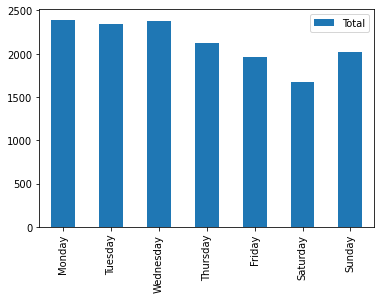

In [ ]:
import matplotlib as plt
# swipe_data.plot()

# supposed to be daily_totals.plot.bar() but apparently daily_totals isn't defined
daily_totals_across_all_meals_df.plot.bar();
# daily_totals_across_all_meals_df.plot.bar(figsize=(20,10), width=0.7, color=('#FA9E1C','#78C4D4','#EE3838'))
# daily_totals_across_all_meals_df.plot.bar(stacked=True, figsize=(20,10), color=('#FA9E1C','#78C4D4','#EE3838'));

<AxesSubplot:>

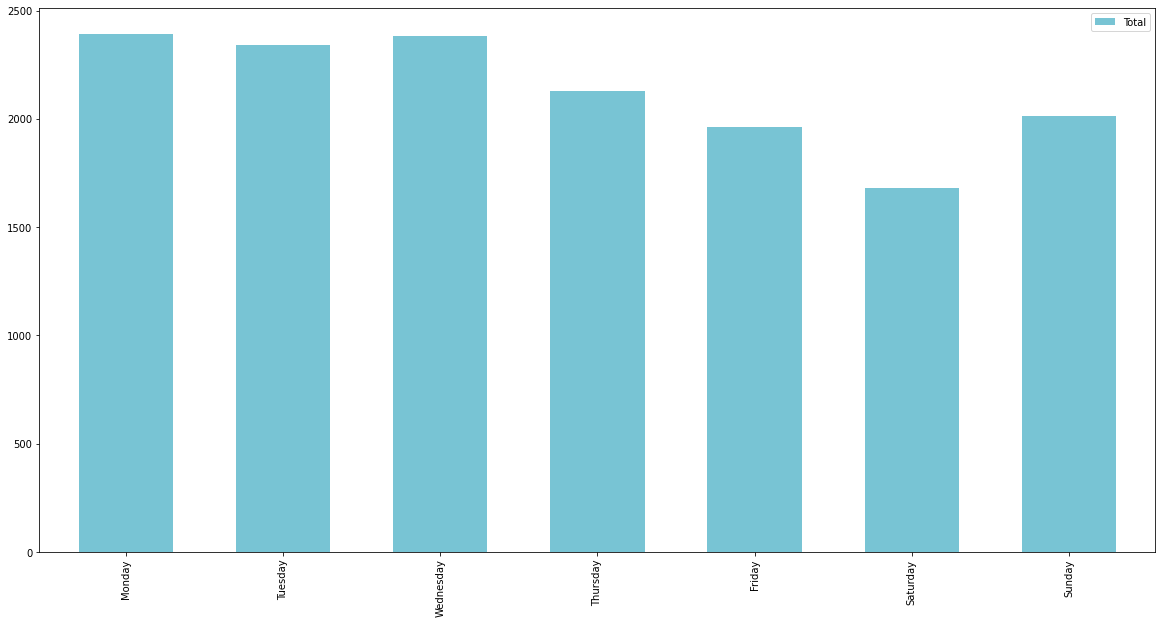

In [ ]:
daily_totals_across_all_meals_df.plot.bar(figsize=(20,10), width=0.6, color=('#78C4D4'))

In [ ]:
# Updates the given dictionary (day) given the firstRow
def getDay(firstRow, day):
    meal = ""
    for rowIndex in range(firstRow, firstRow + 3):
        if rowIndex == firstRow:
            meal = "breakfast"
        elif rowIndex == firstRow + 1:
            meal = "lunch"
        else:
            meal = "dinner"
        for colIndex in range(1, 26, 2):
            val = swipe_data.iloc[rowIndex, colIndex]
            day[meal] += int(val)
def divide(day):
    for meal in day:
        day[meal] /= 2
# Main method
for col in swipe_data.columns:
    index = swipe_data.columns.get_loc(col)
    if index % 2 ==1:
        print(col)
num_cols = 26
monday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
tuesday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
wednesday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
thursday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
friday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
saturday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
sunday = {'breakfast': 0, 'lunch': 0, 'dinner': 0}
for rowIndex in range(len(swipe_data)):
    if rowIndex == 3 or rowIndex == 31:
        getDay(rowIndex, sunday)
    elif rowIndex == 7 or rowIndex == 35:
        getDay(rowIndex, monday)
    elif rowIndex == 11 or rowIndex == 39:
        getDay(rowIndex, tuesday)
    elif rowIndex == 15 or rowIndex == 43:
        getDay(rowIndex, wednesday)
    elif rowIndex == 19:
        getDay(rowIndex, thursday)
    elif rowIndex == 23:
        getDay(rowIndex, friday)
    elif rowIndex == 27:
        getDay(rowIndex, saturday)
divide(sunday)
divide(monday)
divide(tuesday)
divide(wednesday)

Adams
Cabot
Currier
Dunster
Eliot
Kirkland
Leverett
Lowell
Mather
Pforzheimer
Quincy
Winthrop
Annenberg
Unnamed: 27


In [ ]:
!pip install plotly==4.12.0

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
swipes_by_day = {'Monday': monday, 'Tuesday': tuesday, 'Wednesday': wednesday, 'Thursday': thursday, 'Friday': friday, 'Saturday': saturday, 'Sunday': sunday}
#print(swipes_by_day)

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
meals = ['Breakfast', 'Lunch', 'Dinner']

import plotly.express as px
wide_df = swipes_by_day
fig = px.bar(wide_df, x = days, y = meals)
#fig.show()

breakfast = {}
lunch = {}
dinner = {}

breakfast['Monday'] = monday['breakfast']
lunch['Monday'] = monday['lunch']
dinner['Monday'] = monday['dinner']

breakfast['Tuesday'] = tuesday['breakfast']
lunch['Tuesday'] = tuesday['lunch']
dinner['Tuesday'] = tuesday['dinner']

breakfast['Wednesday'] = wednesday['breakfast']
lunch['Wednesday'] = wednesday['lunch']
dinner['Wednesday'] = wednesday['dinner']

breakfast['Thursday'] = thursday['breakfast']
lunch['Thursday'] = thursday['lunch']
dinner['Thursday'] = thursday['dinner']

breakfast['Friday'] = friday['breakfast']
lunch['Friday'] = friday['lunch']
dinner['Friday'] = friday['dinner']

breakfast['Saturday'] = saturday['breakfast']
lunch['Saturday'] = saturday['lunch']
dinner['Saturday'] = saturday['dinner']

breakfast['Sunday'] = sunday['breakfast']
lunch['Sunday'] = sunday['lunch']
dinner['Sunday'] = sunday['dinner']

other_way = {'Breakfast': breakfast, 'Lunch': lunch, 'Dinner': dinner}
wide_df = other_way
fig = px.bar(wide_df, x = days, y = meals, color_discrete_sequence=['#b0171f', '#eb4e42', '#FF9586'], labels = {'value':'Number of Swipes', 'index': '', 'variable': ''}, title="Swipe count across the days of the week")
fig.update_traces(marker_line_width=0)
fig.show()

In [ ]:
#house participation

participation_clean = {}

for colIndex in range(1, 26, 2):
    strVal = swipe_dataframe.iloc[49, colIndex]
    participation_clean[swipe_data.columns[colIndex]] = [int(strVal[0:2])]
print(participation_clean)

houses = ['Adams', 'Cabot']
swipes = [participation_clean['Adams'], participation_clean['Cabot']]
wide_df = participation_clean
fig = px.bar(wide_df, x = houses, y=swipes)
fig.show()


#get rid of unnamed
#convert percent to int value
#compare by house participation (visualization)

{'Adams': [72], 'Cabot': [57], 'Currier': [69], 'Dunster': [72], 'Eliot': [67], 'Kirkland': [60], 'Leverett': [63], 'Lowell': [68], 'Mather': [62], 'Pforzheimer': [68], 'Quincy': [61], 'Winthrop': [62], 'Annenberg': [52]}


ValueError: Cannot accept list of column references or list of columns for both `x` and `y`.

Adams          72%
Cabot          57%
Currier        69%
Dunster        72%
Eliot          67%
Kirkland       60%
Leverett       63%
Lowell         68%
Mather         62%
Pforzheimer    68%
Quincy         61%
Winthrop       62%
Annenberg      52%
Name: 49, dtype: object
['72%', '57%', '69%', '72%', '67%', '60%', '63%', '68%', '62%', '68%', '61%', '62%', '52%']
[72, 57, 69, 72, 67, 60, 63, 68, 62, 68, 61, 62, 52]
             Participation (%)
Adams                       72
Cabot                       57
Currier                     69
Dunster                     72
Eliot                       67
Kirkland                    60
Leverett                    63
Lowell                      68
Mather                      62
Pforzheimer                 68
Quincy                      61
Winthrop                    62
Annenberg                   52


(0.0, 100.0)

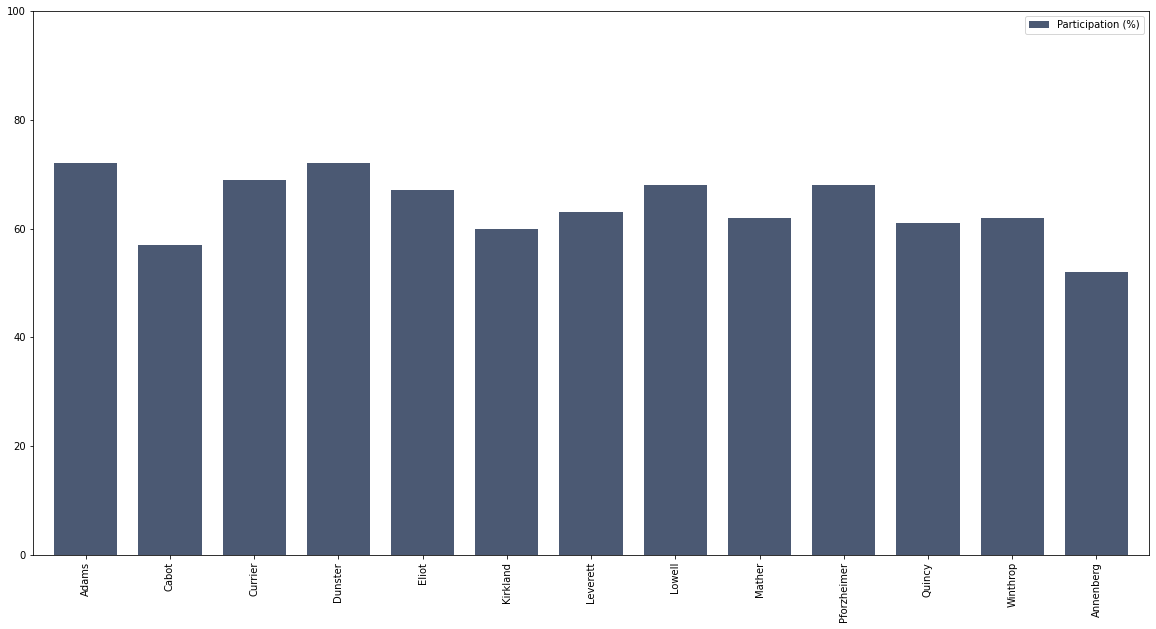

In [ ]:
part = swipe_dataframe.iloc[49]
participation1 = part[valid_columns]
print(participation1)
type(participation1)

print(list(participation1))
num = []
for string in list(participation1):
    num.append(int(string[0:2]))
print(num)

data = {
    'Participation (%)': num
}

participation_final = pd.DataFrame(data, index=valid_columns)

print(participation_final)

participation_final.to_csv('totals_across_houses.csv', index=True, header=True)

participation_final.plot.bar(figsize=(20,10), width=0.75, color='#4B5973')
plt.pyplot.ylim((0, 100))

